<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/MarketMixModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1258]:
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import sklearn
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mas
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [1259]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1260]:
#reading the data 
data_frame=pd.read_csv("./drive/My Drive/ConsumerElectronics.csv")
media_data=pd.read_excel("./drive/My Drive/Media data and other information.xlsx",sheet_name='Media Investment')
climate_2015=pd.read_csv("./drive/My Drive/ONTARIO-2015.csv")
climate_2016=pd.read_csv("./drive/My Drive/ONTARIO-2016.csv")

In [1261]:
df=data_frame.copy()

In [1262]:
#printing some rows of data
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [1263]:
#checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [1264]:
#Preserving main dataframe
df1=df.copy()

In [1265]:
df1.shape

(1648824, 20)

In [1266]:
#We should change the order_date data type for future use
df1["order_date"]=pd.to_datetime(df1["order_date"], errors='coerce')

In [1267]:
#while changing the gmv column to numeric we can find we have some data where gmv is " "
df1[df1["gmv"]==" "].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4.418158e+15,4.418158e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5


In [1268]:
df1[df1["gmv"]==" "].shape

(4904, 20)

In [1269]:
# drop GMV NaN rows and blank rows
df1.dropna(subset=['gmv'], how='all', inplace = True)
df1=df1[df1["gmv"]!=" "]
print(df1.shape)

(1643920, 20)


In [1270]:
#we need to change the data type of gmv(Gross Merchandise Value or Revenue) to int as this is of int type
df1["gmv"]=pd.to_numeric(df1["gmv"])

In [1271]:
#checking shape of data
df1.shape

(1643920, 20)

In [1272]:
#checking for null values in dataset
df1.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [1273]:
df1=df1[(df1["order_date"]>="2015-07-01") & (df1["order_date"]<"2016-07-01")]

In [1274]:
#To check the outliers
df1.quantile([0,.1, .25, .5, .75,.8,.85,.9,.95,.99,0.995, 0.999], axis = 0)

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
0.000,2015.0,1.0,7.633152e+07,1.080165e+08,0.0,1.0,0.0,0.0,-1.0
0.100,2015.0,2.0,1.421607e+15,1.425511e+15,225.0,1.0,2.0,449.0,1.0
0.250,2015.0,3.0,1.602328e+15,1.606228e+15,340.0,1.0,4.0,799.0,1.0
0.500,2016.0,6.0,2.611469e+15,2.618941e+15,750.0,1.0,6.0,1599.0,2.0
0.750,2016.0,10.0,3.610584e+15,4.397625e+15,1999.0,1.0,7.0,3499.0,3.0
0.800,2016.0,10.0,4.414414e+15,4.441488e+15,2485.0,1.0,8.0,3999.0,4.0
0.850,2016.0,11.0,4.462648e+15,4.503200e+15,2999.0,1.0,8.0,4999.0,5.0
0.900,2016.0,11.0,4.520719e+15,4.561026e+15,4399.0,1.0,9.0,7120.0,5.0
0.950,2016.0,12.0,4.579021e+15,4.622239e+15,10491.0,1.0,10.0,16959.0,5.0
0.990,2016.0,12.0,4.626487e+15,3.000373e+17,30900.0,2.0,13.0,45990.0,13.0


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

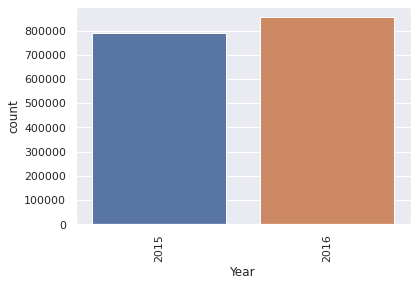

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

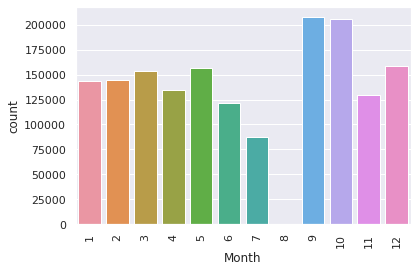

(array([0]), <a list of 1 Text major ticklabel objects>)

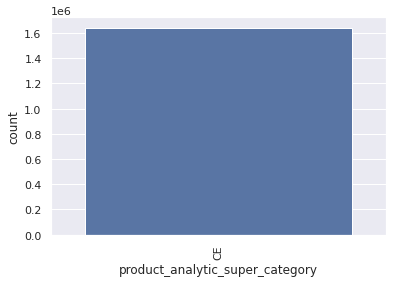

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

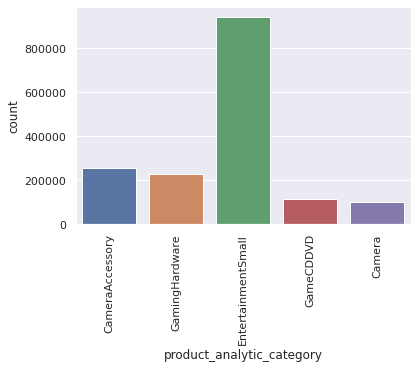

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

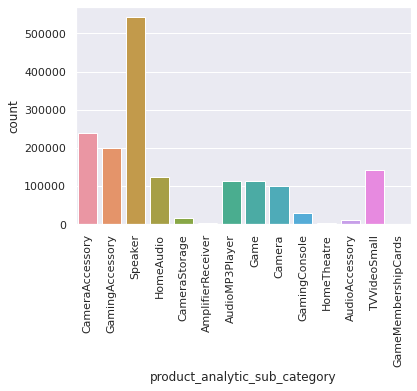

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

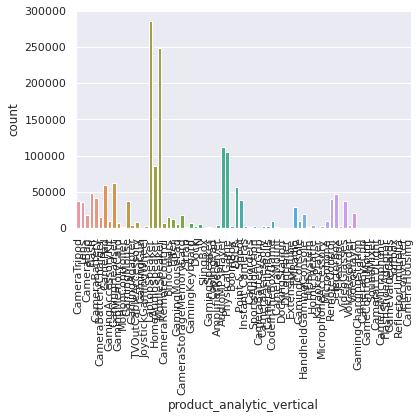

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

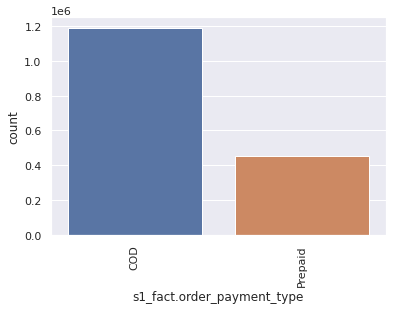

In [1275]:
arr=["Year","Month","product_analytic_super_category","product_analytic_category","product_analytic_sub_category","product_analytic_vertical","s1_fact.order_payment_type"]
for i in arr:
  sns.countplot(x=i,data=df1)
  plt.xticks(rotation=90)
  plt.show()

<Figure size 576x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

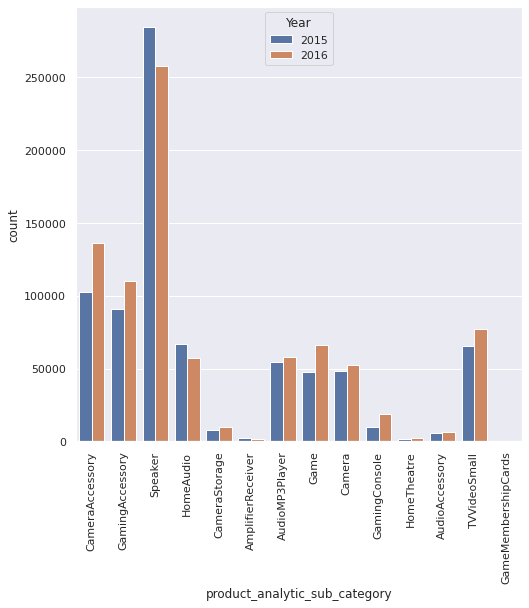

In [1276]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_sub_category",hue="Year",data=df1)
plt.xticks(rotation=90)
plt.show()

In [1277]:
#As we can see we have only 2 types of payment i am converting them into 0 and 1 that may be helpful in future calculation
df1["s1_fact.order_payment_type"].replace("COD",1,inplace=True)
df1["s1_fact.order_payment_type"].replace("Prepaid",0,inplace=True)

<Figure size 576x576 with 0 Axes>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

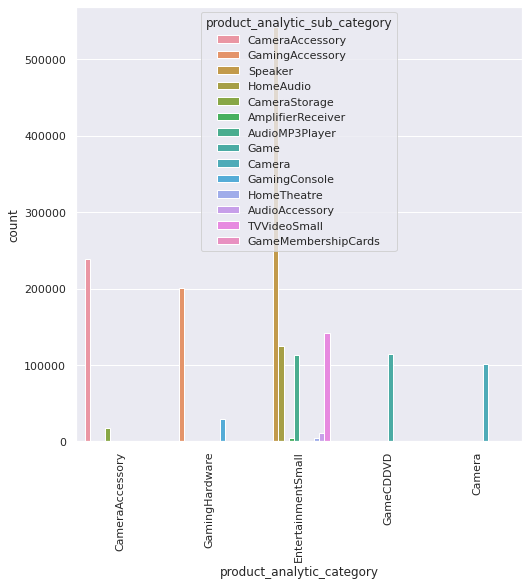

In [1278]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_category",hue="product_analytic_sub_category",data=df1)
plt.xticks(rotation=90)
plt.show()

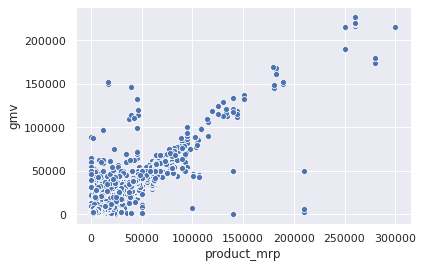

In [1279]:
sns.scatterplot(x="product_mrp",y="gmv",data=df1)

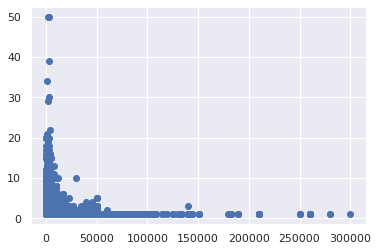

In [1280]:
plt.scatter(df1["product_mrp"],df1["units"])

In [1281]:
#sns.pairplot(df1)

In [1282]:
df1.describe()

,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_mrp,product_procurement_sla
count,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06,1.643311e+06
mean,2.015520e+03,6.577452e+00,2.842517e+15,1.370126e+16,2.460978e+03,1.022073e+00,7.247314e-01,5.687943e+00,4.110025e+03,5.405251e+00
std,4.996029e-01,3.625777e+00,1.268552e+15,5.580986e+16,5.617944e+03,2.532918e-01,4.466497e-01,2.983854e+00,8.514406e+03,5.348228e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602328e+15,1.606228e+15,3.400000e+02,1.000000e+00,0.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611469e+15,2.618941e+15,7.500000e+02,1.000000e+00,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610584e+15,4.397625e+15,1.999000e+03,1.000000e+00,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.000000e+00,1.006000e+03,2.999990e+05,1.000000e+03


## Some Checks on Data like mrp should be greater than 0.

In [1283]:
#removing rows having price < 0 as we can see in the description the minimum value of price is 0. And this is not correct
df1=df1[df1["product_mrp"]>0]

In [1284]:
#gmv(Gross Merchandise Value or Revenue) should be greater than product_mrp * units. So, removing the data which does not satisfy the criteria
df1=df1[df1["gmv"]<df1["product_mrp"]*df1["units"]]

In [1285]:
#printing the shape of data after removing unwanted data
df1.shape

(1578956, 20)

In [1286]:
#printing the shape of original data 
df.shape

(1648824, 20)

In [1287]:
df1.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [1288]:
# Listing price : gmv / units
df1['listingprice']=df1['gmv']/df1['units']
df1['discountprice']=(df1['product_mrp']- df1['listingprice'])/df1['units']

# moving average
df1['movingavg_gmv'] = df1['gmv'].rolling(window=1).mean()
df1['movingavg_listingprice'] = df1['listingprice'].rolling(window=1).mean()
df1['movingavg_discountprice'] = df1['discountprice'].rolling(window=1).mean()

#clumulative moving average
df1['cumulative_movingavg_gmv'] = df1['gmv'].expanding(min_periods=1).mean()
df1['cumulative_movingavg_listingprice'] = df1['listingprice'].expanding(min_periods=1).mean()
df1['cumulative_movingavg_discountprice'] = df1['discountprice'].expanding(min_periods=1).mean()


#Exponential moving average
df1['exponential_movingavg_gmv'] = df1['gmv'].ewm(span=1).mean()
df1['exponential_movingavg_listingprice'] = df1['listingprice'].ewm(span=1).mean()
df1['exponential_movingavg_discountprice'] = df1['discountprice'].ewm(span=1).mean()

# Lag
df1['lag_discountprice'] =df1['discountprice'].shift(1)
df1['lag_GMV'] =df1['gmv'].shift(1)

In [1289]:
df1.shape

(1578956, 33)

<Figure size 1440x1440 with 0 Axes>

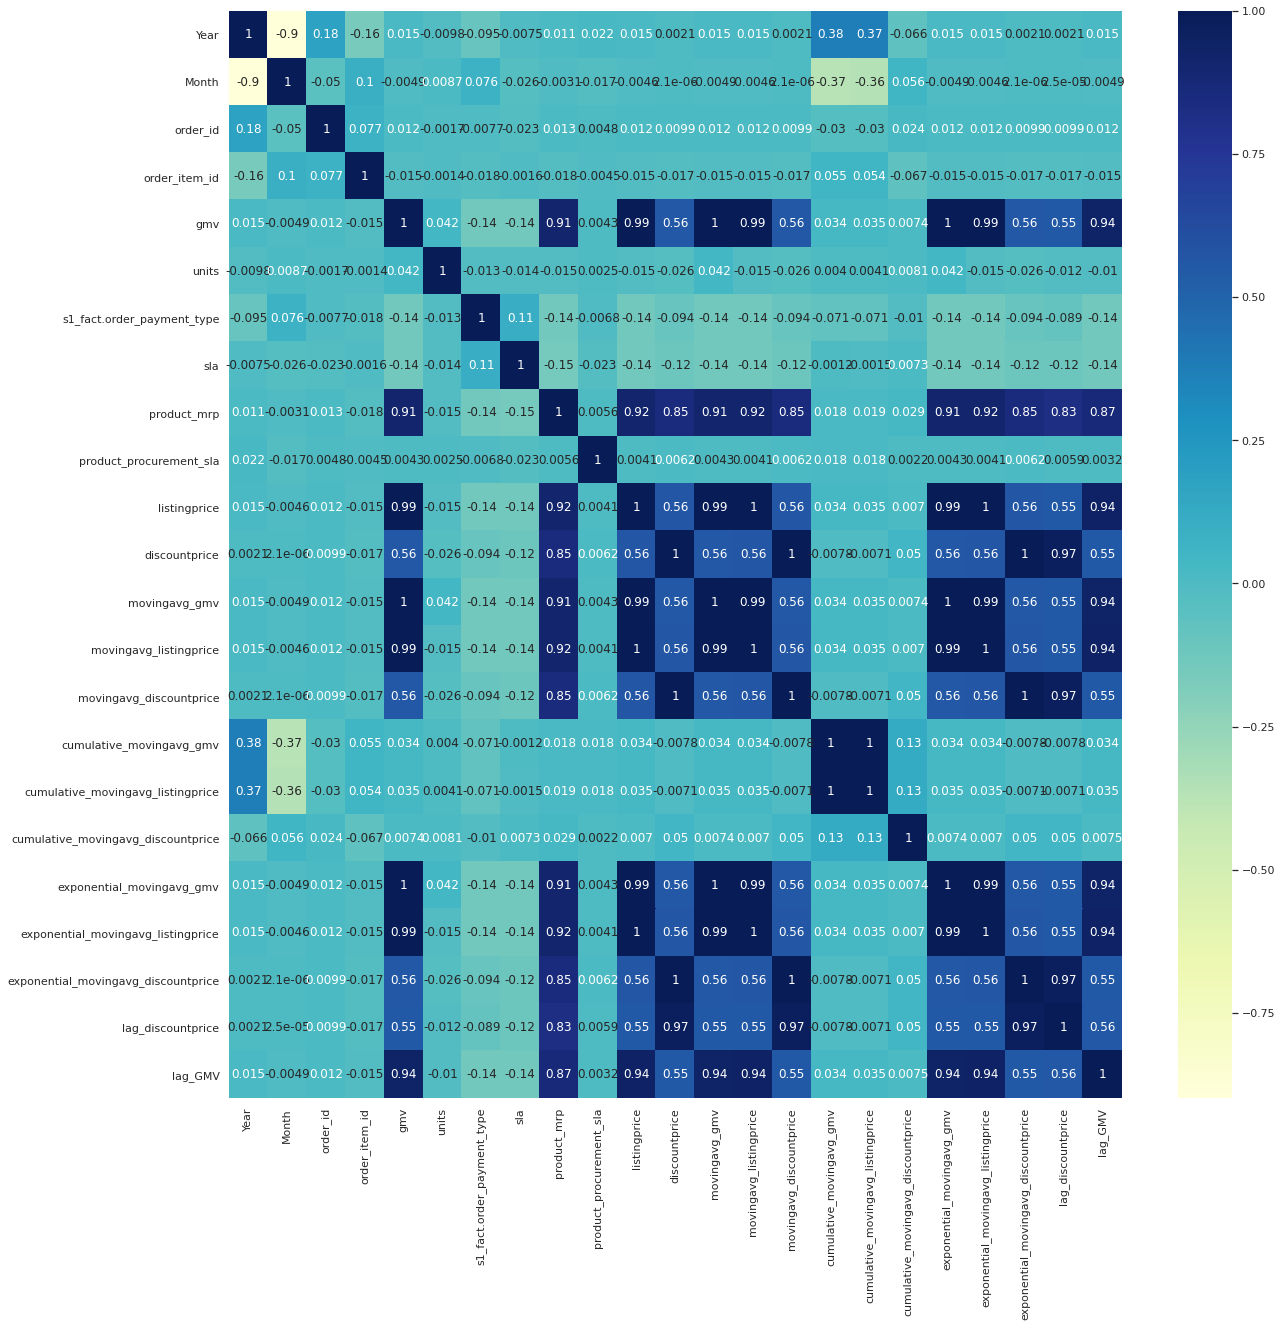

In [1290]:
plt.figure(figsize = (20, 20))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing the data on the basis of product subcategories.

In [1291]:
df1["product_analytic_sub_category"].value_counts()

Speaker                531330
CameraAccessory        228846
GamingAccessory        195442
TVVideoSmall           140428
HomeAudio              118097
AudioMP3Player         111002
Camera                  99353
Game                    90750
GamingConsole           27557
CameraStorage           17653
AudioAccessory          10265
HomeTheatre              4132
AmplifierReceiver        4004
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [1292]:
df_homeaudio=df1[df1["product_analytic_sub_category"] == "HomeAudio"].copy()

In [1293]:
df_CameraAccessory=df1[df1["product_analytic_sub_category"] == "CameraAccessory"].copy()

In [1294]:
df_GamingAccessory=df1[df1["product_analytic_sub_category"] == "GamingAccessory"].copy()

In [1295]:
#printing some data from each of the data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listingprice,discountprice,movingavg_gmv,movingavg_listingprice,movingavg_discountprice,cumulative_movingavg_gmv,cumulative_movingavg_listingprice,cumulative_movingavg_discountprice,exponential_movingavg_gmv,exponential_movingavg_listingprice,exponential_movingavg_discountprice,lag_discountprice,lag_GMV
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,7049.0,450.0,7049.0,7049.0,450.0,4116.589440,4080.819684,2865.069744,7049.0,7049.0,450.0,5470.0,2850.0
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,5489.0,2010.0,5489.0,5489.0,2010.0,4117.082226,4081.325314,2864.762717,5489.0,5489.0,2010.0,450.0,7049.0
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6255.0,1244.0,6255.0,6255.0,1244.0,4117.849605,4082.105528,2864.180964,6255.0,6255.0,1244.0,2010.0,5489.0
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6099.0,1400.0,6099.0,6099.0,1400.0,4118.560459,4082.829207,2863.655603,6099.0,6099.0,1400.0,1244.0,6255.0
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6850.0,649.0,6850.0,6850.0,649.0,4119.540172,4083.821736,2862.861251,6850.0,6850.0,649.0,1400.0,6099.0


In [1296]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listingprice,discountprice,movingavg_gmv,movingavg_listingprice,movingavg_discountprice,cumulative_movingavg_gmv,cumulative_movingavg_listingprice,cumulative_movingavg_discountprice,exponential_movingavg_gmv,exponential_movingavg_listingprice,exponential_movingavg_discountprice,lag_discountprice,lag_GMV
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,6400.0,790.0,6400.0,6400.0,790.0,6400.000000,6400.000000,790.000000,6400.0,6400.0,790.0,NaN,NaN
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,6900.0,290.0,6900.0,6900.0,290.0,6650.000000,6650.000000,540.000000,6900.0,6900.0,290.0,790.0,6400.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1990.0,109.0,1990.0,1990.0,109.0,5096.666667,5096.666667,396.333333,1990.0,1990.0,109.0,290.0,6900.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1690.0,409.0,1690.0,1690.0,409.0,4245.000000,4245.000000,399.500000,1690.0,1690.0,409.0,109.0,1990.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1618.0,481.0,1618.0,1618.0,481.0,3719.600000,3719.600000,415.800000,1618.0,1618.0,481.0,409.0,1690.0


In [1297]:
df_GamingAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listingprice,discountprice,movingavg_gmv,movingavg_listingprice,movingavg_discountprice,cumulative_movingavg_gmv,cumulative_movingavg_listingprice,cumulative_movingavg_discountprice,exponential_movingavg_gmv,exponential_movingavg_listingprice,exponential_movingavg_discountprice,lag_discountprice,lag_GMV
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075.0,1,\N,\N,1,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,3075.0,924.0,3075.0,3075.0,924.0,6206.641401,6182.846497,4163.064968,3075.0,3075.0,924.0,2001.0,8399.0
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750.0,1,\N,\N,1,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2750.0,1249.0,2750.0,2750.0,1249.0,6204.441120,6180.661362,4161.210057,2750.0,2750.0,1249.0,924.0,3075.0
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899.0,1,\N,\N,0,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2899.0,1100.0,2899.0,2899.0,1100.0,6202.338422,6178.573791,4159.262723,2899.0,2899.0,1100.0,1249.0,2750.0
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,\N,\N,0,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2609.0,1390.0,2609.0,2609.0,1390.0,6200.054037,6176.304514,4157.502225,2609.0,2609.0,1390.0,1100.0,2899.0
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772.0,1,\N,\N,0,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2772.0,1227.0,2772.0,2772.0,1227.0,6197.876112,6174.141677,4155.640407,2772.0,2772.0,1227.0,1390.0,2609.0


In [1298]:
#printing the shape of all the three data frame
print(df_CameraAccessory.shape)
print(df_GamingAccessory.shape)
print(df_homeaudio.shape)

(228846, 33)
(195442, 33)
(118097, 33)


In [1299]:
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listingprice,discountprice,movingavg_gmv,movingavg_listingprice,movingavg_discountprice,cumulative_movingavg_gmv,cumulative_movingavg_listingprice,cumulative_movingavg_discountprice,exponential_movingavg_gmv,exponential_movingavg_listingprice,exponential_movingavg_discountprice,lag_discountprice,lag_GMV
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,7049.0,450.0,7049.0,7049.0,450.0,4116.589440,4080.819684,2865.069744,7049.0,7049.0,450.0,5470.0,2850.0
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,5489.0,2010.0,5489.0,5489.0,2010.0,4117.082226,4081.325314,2864.762717,5489.0,5489.0,2010.0,450.0,7049.0
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6255.0,1244.0,6255.0,6255.0,1244.0,4117.849605,4082.105528,2864.180964,6255.0,6255.0,1244.0,2010.0,5489.0
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6099.0,1400.0,6099.0,6099.0,1400.0,4118.560459,4082.829207,2863.655603,6099.0,6099.0,1400.0,1244.0,6255.0
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,6850.0,649.0,6850.0,6850.0,649.0,4119.540172,4083.821736,2862.861251,6850.0,6850.0,649.0,1400.0,6099.0


In [1300]:
#Adding Week column in the each data frame
df_CameraAccessory['order_week'] = df_CameraAccessory['order_date'].dt.week
df_CameraAccessory.loc[(df_CameraAccessory.Year == 2016) & (df_CameraAccessory['order_date'].dt.week !=53), 'order_week'] = 53+df_CameraAccessory['order_date'].dt.week
df_GamingAccessory[ 'order_week'] = df_GamingAccessory['order_date'].dt.week
df_GamingAccessory.loc[(df_GamingAccessory.Year == 2016) & (df_GamingAccessory['order_date'].dt.week !=53),'order_week'] = 53+df_GamingAccessory['order_date'].dt.week
df_homeaudio['order_week'] = df_homeaudio['order_date'].dt.week
df_homeaudio.loc[(df_homeaudio.Year == 2016) & (df_homeaudio['order_date'].dt.week !=53),'order_week'] = 53+df_homeaudio['order_date'].dt.week

<Figure size 864x864 with 0 Axes>

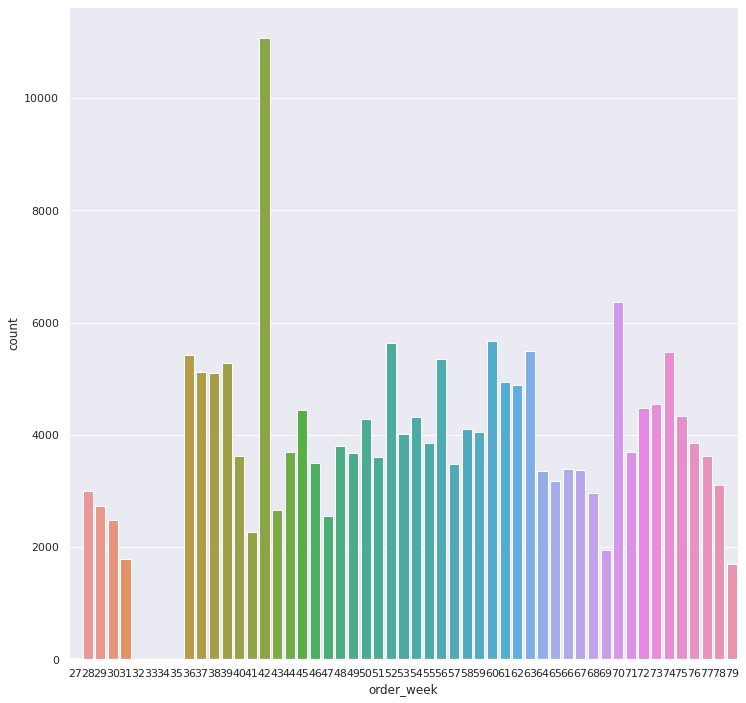

In [1301]:
plt.figure(figsize=(12,12))
sns.countplot(x="order_week",data=df_GamingAccessory)
plt.show()

In [1302]:
CameraAccessory=df_CameraAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","discountprice"].mean()

In [1303]:
#printing some rows of the gropped data frame 
CameraAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,discountprice
order_week,,,,,,,
27,2015.0,7.000000,673.846154,1.000000,2.384615,1511.961538,838.115385
28,2015.0,7.000000,1386.909710,1.045503,7.056252,2487.551415,1097.306787
29,2015.0,7.000000,1503.612204,1.032678,6.390797,2577.021007,1081.177270
30,2015.0,7.000000,1467.413828,1.039798,6.410455,2563.709949,1111.798583
31,2015.0,7.001017,1479.638027,1.047789,6.379258,2509.507880,1037.792027


In [1304]:
GamingAccessory=round(df_GamingAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","discountprice"].mean())

In [1305]:
GamingAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,discountprice
order_week,,,,,,,
27,2015.0,7.0,1342.0,1.0,3.0,3765.0,2439.0
28,2015.0,7.0,907.0,1.0,5.0,1832.0,949.0
29,2015.0,7.0,836.0,1.0,5.0,1812.0,989.0
30,2015.0,7.0,1051.0,1.0,5.0,2324.0,1282.0
31,2015.0,7.0,1052.0,1.0,6.0,5034.0,4018.0


In [1306]:
homeaudio=round(df_homeaudio.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","discountprice"].mean())

In [1307]:
homeaudio.head()

,Year,Month,gmv,units,sla,product_mrp,discountprice
order_week,,,,,,,
27,2015.0,7.0,2801.0,1.0,3.0,4690.0,1889.0
28,2015.0,7.0,2228.0,1.0,7.0,3513.0,1296.0
29,2015.0,7.0,2234.0,1.0,7.0,3626.0,1402.0
30,2015.0,7.0,2149.0,1.0,7.0,3562.0,1421.0
31,2015.0,7.0,2210.0,1.0,7.0,3608.0,1406.0


Working and Merging data with main data frame

In [1308]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233


In [1309]:
media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int64  
 1   Month              12 non-null     int64  
 2   Total Investment   12 non-null     float64
 3   TV                 12 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  NPS                12 non-null     float64
 11  Stock Index        12 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 1.2 KB


In [1310]:
#Removing Space from Affiliates
media_data=media_data.rename({" Affiliates": "Affiliates"},axis=1)

In [1311]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233


In [1312]:
#Adding addstock variable
media_data["Adstock_Digital"] =media_data["Digital"] + (0.5 * media_data["Digital"].shift(1))
media_data["Adstock_Sponsorship"] =media_data["Sponsorship"]+ (0.5 * media_data["Sponsorship"].shift(1))
media_data["Adstock_Online marketing"] =media_data["Online marketing"] + (0.5 * media_data["Online marketing"].shift(1))
media_data["Adstock_TV"] =media_data["TV"] + (0.5 * media_data["TV"].shift(1))
media_data["Adstock_Digital"][0] =media_data["Digital"][0]
media_data["Adstock_Sponsorship"][0] =media_data["Sponsorship"][0]
media_data["Adstock_Online marketing"][0] =media_data["Online marketing"][0]
media_data["Adstock_TV"][0] =media_data["TV"][0]

In [1313]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101,1.995564,63.319317,16.444612,3.882723
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210,13.300744,116.066357,32.561773,8.084463
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233,7.586709,56.508382,31.747463,7.292985


Text(5.5, 10, 'TV Advertising Adstock Transformation')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'TV Adstock & Advertising')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11')]

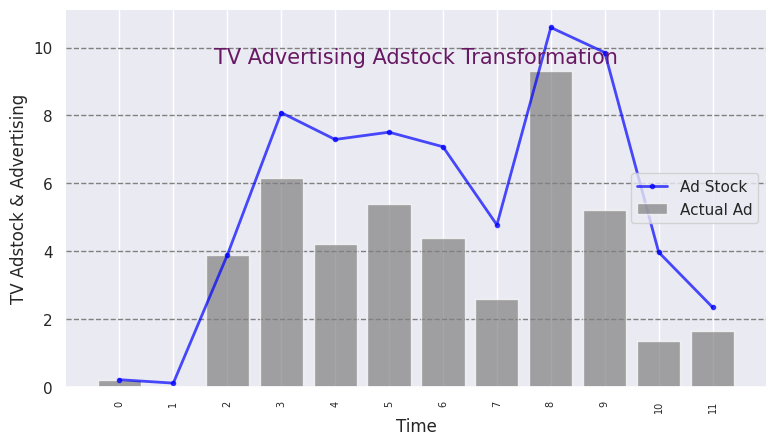

In [1314]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(media_data['TV'])), media_data['TV'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(media_data['TV'])), media_data['Adstock_TV'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate("TV Advertising Adstock Transformation", (np.mean(np.arange(len(media_data['TV']))), 10),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel('TV Adstock & Advertising')
ax.set_xticks(np.arange(len(media_data['TV'])))
ax.set_xticklabels(labels=np.arange(len(media_data['TV'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

## Merging Media Datframe to main data frame

In [1315]:
CameraAccessory.reset_index(inplace=True)
camedia=CameraAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [1316]:
camedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV
0,27,2015.0,7.0,673.846154,1.000000,2.384615,1511.961538,838.115385,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330
1,28,2015.0,7.0,1386.909710,1.045503,7.056252,2487.551415,1097.306787,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330
2,29,2015.0,7.0,1503.612204,1.032678,6.390797,2577.021007,1081.177270,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330
3,30,2015.0,7.0,1467.413828,1.039798,6.410455,2563.709949,1111.798583,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330
4,32,2015.0,8.0,699.000000,1.000000,5.000000,1450.000000,751.000000,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103


In [1317]:
homeaudio.reset_index(inplace=True)

In [1318]:
hamedia=homeaudio.merge(media_data,how="inner",on=["Year","Month"])

In [1319]:
hamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV
0,27,2015.0,7.0,2801.0,1.0,3.0,4690.0,1889.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
1,28,2015.0,7.0,2228.0,1.0,7.0,3513.0,1296.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
2,29,2015.0,7.0,2234.0,1.0,7.0,3626.0,1402.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
3,30,2015.0,7.0,2149.0,1.0,7.0,3562.0,1421.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
4,31,2015.0,7.0,2210.0,1.0,7.0,3608.0,1406.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533


In [1320]:
GamingAccessory.reset_index(inplace=True)
gamedia=GamingAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [1321]:
gamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV
0,27,2015.0,7.0,1342.0,1.0,3.0,3765.0,2439.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
1,28,2015.0,7.0,907.0,1.0,5.0,1832.0,949.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
2,29,2015.0,7.0,836.0,1.0,5.0,1812.0,989.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
3,30,2015.0,7.0,1051.0,1.0,5.0,2324.0,1282.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533
4,31,2015.0,7.0,1052.0,1.0,6.0,5034.0,4018.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533


In [1322]:
print(gamedia.shape)
print(hamedia.shape)
print(camedia.shape)

(53, 22)
(50, 22)
(42, 22)


Working on climate data

In [1323]:
climate_2015.shape

(365, 27)

In [1324]:
climate_2016.shape

(366, 27)

In [1325]:
print(climate_2016.info())
print(climate_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date/Time                  366 non-null    object 
 1   Year                       366 non-null    int64  
 2   Month                      366 non-null    int64  
 3   Day                        366 non-null    int64  
 4   Data Quality               227 non-null    object 
 5   Max Temp (°C)              226 non-null    float64
 6   Max Temp Flag              1 non-null      object 
 7   Min Temp (°C)              219 non-null    float64
 8   Min Temp Flag              8 non-null      object 
 9   Mean Temp (°C)             219 non-null    float64
 10  Mean Temp Flag             8 non-null      object 
 11  Heat Deg Days (°C)         219 non-null    float64
 12  Heat Deg Days Flag         8 non-null      object 
 13  Cool Deg Days (°C)         219 non-null    float64

In [1326]:
climate_2015.isnull().sum()

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 136
Max Temp (°C)                149
Max Temp Flag                352
Min Temp (°C)                175
Min Temp Flag                326
Mean Temp (°C)               175
Mean Temp Flag               326
Heat Deg Days (°C)           175
Heat Deg Days Flag           326
Cool Deg Days (°C)           175
Cool Deg Days Flag           326
Total Rain (mm)              136
Total Rain Flag              358
Total Snow (cm)              136
Total Snow Flag              356
Total Precip (mm)            136
Total Precip Flag            353
Snow on Grnd (cm)            136
Snow on Grnd Flag            363
Dir of Max Gust (10s deg)    365
Dir of Max Gust Flag         365
Spd of Max Gust (km/h)       365
Spd of Max Gust Flag         365
dtype: int64

In [1327]:
climate_2016.isnull().sum()

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 139
Max Temp (°C)                140
Max Temp Flag                365
Min Temp (°C)                147
Min Temp Flag                358
Mean Temp (°C)               147
Mean Temp Flag               358
Heat Deg Days (°C)           147
Heat Deg Days Flag           358
Cool Deg Days (°C)           147
Cool Deg Days Flag           358
Total Rain (mm)              139
Total Rain Flag              363
Total Snow (cm)              139
Total Snow Flag              359
Total Precip (mm)            139
Total Precip Flag            359
Snow on Grnd (cm)            139
Snow on Grnd Flag            360
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag         366
dtype: int64

In [1328]:
#dropping Unwanted columns from both the data frame
columns=["Data Quality","Spd of Max Gust Flag","Spd of Max Gust (km/h)","Dir of Max Gust Flag","Dir of Max Gust (10s deg)","Snow on Grnd Flag","Total Precip Flag","Total Snow Flag","Total Rain Flag"
          ,"Cool Deg Days Flag","Heat Deg Days Flag","Mean Temp Flag","Min Temp Flag","Max Temp Flag"]
climate_2015.drop(columns,axis=1,inplace=True)


In [1329]:
climate_2016.drop(columns,axis=1,inplace=True)

In [1330]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [1331]:
#printing shape of both the dataframe
print(climate_2015.shape)
print(climate_2016.shape)

(365, 13)
(366, 13)


In [1332]:
#concatting both the data frame
climate=climate_2015.append(climate_2016)

In [1333]:
climate=climate[(climate["Date/Time"]>="2015-07-01") & (climate["Date/Time"]<"2016-07-01")]

In [1334]:
climate.reset_index(inplace=True)

In [1335]:
climate['Date/Time'] = pd.to_datetime(climate['Date/Time'],errors='coerce')

In [1336]:
climate['week'] = climate['Date/Time'].dt.week
climate.loc[(climate.Year == 2016) & (climate['Date/Time'].dt.week !=53), 'week'] = 53+climate['Date/Time'].dt.week

In [1337]:
climate.drop("index",axis=1,inplace=True)

In [1338]:
gropped_climate=round(climate.groupby("week").mean())

In [1339]:
gropped_climate.head()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
week,,,,,,,,,,,,
27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1340]:
camedia.shape

(42, 22)

In [1341]:
gropped_climate.shape

(53, 12)

Merging climate data in all three dataframe

In [1342]:
gropped_climate.reset_index(inplace=True)
camdcl=camedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1343]:
camdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,673.846154,1.000000,2.384615,1511.961538,838.115385,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,1386.909710,1.045503,7.056252,2487.551415,1097.306787,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,1503.612204,1.032678,6.390797,2577.021007,1081.177270,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,1467.413828,1.039798,6.410455,2563.709949,1111.798583,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,32,2015.0,8.0,699.000000,1.000000,5.000000,1450.000000,751.000000,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103,32,2015.0,8.0,6.0,27.0,16.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0


In [1344]:
gamdcl=gamedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1345]:
hamdcl=hamedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1346]:
gamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,1342.0,1.0,3.0,3765.0,2439.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,907.0,1.0,5.0,1832.0,949.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,836.0,1.0,5.0,1812.0,989.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,1051.0,1.0,5.0,2324.0,1282.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,31,2015.0,7.0,1052.0,1.0,6.0,5034.0,4018.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1347]:
hamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,2801.0,1.0,3.0,4690.0,1889.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,2228.0,1.0,7.0,3513.0,1296.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,2234.0,1.0,7.0,3626.0,1402.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,2149.0,1.0,7.0,3562.0,1421.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,31,2015.0,7.0,2210.0,1.0,7.0,3608.0,1406.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1348]:
print(gamdcl.shape)
print(hamdcl.shape)
print(camdcl.shape)

(53, 35)
(50, 35)
(42, 35)


		Holiday list
	2015	 
         (18-19th July)
		     (15-17th Aug)
		     (28-30th Aug)
		     (17-15th Oct)
		     (7-14th Nov)
		    (25th Dec'15 - 3rd Jan'16)
	2016	 
    (20-22 Jan)
		(1-2 Feb)
		(20-21 Feb)
		(14-15 Feb)
		(7-9 Mar)
		(25-27 May)

In [1349]:
#making a list of holidays
holidays=pd.DataFrame(["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17",
          "2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27"
          ,"2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22",
          "2016-02-01","2016-02-02","2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08","2016-03-09","2016-05-25","2016-05-26","2016-05-27"],columns=["Date"])

In [1350]:
holidays["Date"]=pd.to_datetime(holidays.Date)

In [1351]:
holidays['week'] = holidays['Date'].dt.week
holidays.loc[(holidays['Date'].dt.year == 2016) & (holidays['Date'].dt.week !=53), 'week'] = 53+holidays['Date'].dt.week

In [1352]:
holidays.head()

,Date,week
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34


In [1353]:
#Adding holidays flag to main dataframe
gamdcl["holidays"]=gamdcl.week.isin(holidays.week).astype(np.int8)
camdcl["holidays"]=camdcl.week.isin(holidays.week).astype(np.int8)
hamdcl["holidays"] = hamdcl.week.isin(holidays.week).astype(np.int8)

PayDay Addition
As we know only 1st and 15th of month is payday.we will find weeks for all the months.

In [1354]:
payday=pd.DataFrame(["2015-07-01","2015-07-15","2015-08-01","2015-08-15","2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01","2015-11-15","2015-12-01",
                     "2015-12-15","2016-01-01","2016-01-15","2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01","2016-04-15","2016-05-01","2016-05-15",
                     "2016-06-01","2016-06-15"],columns=["Date"])

In [1355]:
payday["Date"]=pd.to_datetime(payday.Date)

In [1356]:
payday.head()

,Date
0,2015-07-01
1,2015-07-15
2,2015-08-01
3,2015-08-15
4,2015-09-01


In [1357]:
payday['week'] = payday['Date'].dt.week
payday.loc[(payday['Date'].dt.year == 2016) & (payday['Date'].dt.week !=53), 'week'] = 53+payday['Date'].dt.week

In [1358]:
#Adding payday flag to main dataframe
gamdcl["payday"]=gamdcl.week.isin(payday.week).astype(np.int8)
camdcl["payday"]=camdcl.week.isin(payday.week).astype(np.int8)
hamdcl["payday"] = hamdcl.week.isin(payday.week).astype(np.int8)

In [1359]:
gamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,2015.0,7.0,1342.0,1.0,3.0,3765.0,2439.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,2015.0,7.0,907.0,1.0,5.0,1832.0,949.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,2015.0,7.0,836.0,1.0,5.0,1812.0,989.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,2015.0,7.0,1051.0,1.0,5.0,2324.0,1282.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,2015.0,7.0,1052.0,1.0,6.0,5034.0,4018.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1360]:
#dropping Year_x and month_x from each of the df.
gamdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)
hamdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)
camdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)

In [1361]:
gamdcl.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
discountprice               0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
Affiliates                  0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Adstock_TV                  0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               1
Mean Temp (°C)              1
Heat Deg Days (°C)          1
Cool Deg Days (°C)          1
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday    

In [1362]:
#filling null value by columns mean
gamdcl["Min Temp (°C)"].fillna(gamdcl["Min Temp (°C)"].mean(),inplace=True)
gamdcl["Mean Temp (°C)"].fillna(gamdcl["Mean Temp (°C)"].mean(),inplace=True) 
gamdcl["Heat Deg Days (°C)"].fillna(gamdcl["Heat Deg Days (°C)"].mean(),inplace=True) 
gamdcl["Cool Deg Days (°C)"].fillna(gamdcl["Cool Deg Days (°C)"].mean(),inplace=True)  

In [1363]:
hamdcl.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
discountprice               0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
Affiliates                  0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Adstock_TV                  0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               1
Mean Temp (°C)              1
Heat Deg Days (°C)          1
Cool Deg Days (°C)          1
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday    

In [1364]:
#filling null value by columns mean
hamdcl["Min Temp (°C)"].fillna(hamdcl["Min Temp (°C)"].mean(),inplace=True)
hamdcl["Mean Temp (°C)"].fillna(hamdcl["Mean Temp (°C)"].mean(),inplace=True) 
hamdcl["Heat Deg Days (°C)"].fillna(hamdcl["Heat Deg Days (°C)"].mean(),inplace=True) 
hamdcl["Cool Deg Days (°C)"].fillna(hamdcl["Cool Deg Days (°C)"].mean(),inplace=True) 

In [1365]:
camdcl.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
discountprice               0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
Affiliates                  0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Adstock_TV                  0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               1
Mean Temp (°C)              1
Heat Deg Days (°C)          1
Cool Deg Days (°C)          1
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday    

In [1366]:
#filling null value by columns mean
camdcl["Min Temp (°C)"].fillna(camdcl["Min Temp (°C)"].mean(),inplace=True)
camdcl["Mean Temp (°C)"].fillna(camdcl["Mean Temp (°C)"].mean(),inplace=True) 
camdcl["Heat Deg Days (°C)"].fillna(camdcl["Heat Deg Days (°C)"].mean(),inplace=True) 
camdcl["Cool Deg Days (°C)"].fillna(camdcl["Cool Deg Days (°C)"].mean(),inplace=True) 

# Linear Regression Model

Preparing Modeling for all the gamdcl data frame.

In [1367]:
#train test split
# Putting response variable to y
y = gamdcl['gmv']
y.head()

0    1342.0
1     907.0
2     836.0
3    1051.0
4    1052.0
Name: gmv, dtype: float64

In [1368]:
# Putting feature variable to X
X = gamdcl.drop("gmv",axis = 1)
X.head()

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,1.0,3.0,3765.0,2439.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1.0,5.0,1832.0,949.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1.0,5.0,1812.0,989.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1.0,5.0,2324.0,1282.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,1.0,6.0,5034.0,4018.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1369]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [1370]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(39, 33)

(39,)

(14, 33)

(14,)

In [1371]:
#scalling the data
scaler = MinMaxScaler()

In [1372]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [1373]:
X_train.head()

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,0.000000,0.0,0.000000,0.714703,0.561495,0.072671,0.022477,0.170716,0.075960,0.000269,0.049419,0.064905,0.085341,0.654397,0.713656,0.109722,0.023755,0.016020,0.009660,0.0,0.545455,0.00,0.81250,0.785714,0.793103,0.000000,0.142857,0.000000,0.0,0.0000,0.0,0.0,1.0
11,0.196078,0.0,0.666667,0.344874,0.236378,0.552359,0.416747,0.074017,0.738248,0.177199,0.670340,0.680423,0.125406,0.162106,0.378855,0.065286,0.526065,0.469191,0.359639,0.0,0.727273,0.28,0.75000,0.857143,0.793103,0.045455,0.428571,0.076923,0.0,0.0625,0.0,0.0,0.0
26,0.490196,0.0,1.000000,0.273156,0.201609,0.615905,0.580086,0.214307,0.665502,0.309895,0.922944,0.925570,0.294678,0.089912,0.101322,0.206299,0.530307,0.944023,0.705581,0.0,1.000000,0.84,0.37500,0.392857,0.413793,0.454545,0.000000,0.538462,0.0,0.4375,0.0,1.0,0.0
41,0.803922,0.0,1.000000,0.249101,0.108978,0.313667,0.559394,0.034183,0.278020,0.010124,0.675889,0.770220,0.058015,0.476577,1.000000,0.059195,0.362393,0.747641,0.929591,1.0,0.272727,0.44,0.59375,0.357143,0.482759,0.363636,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.0
28,0.549020,0.0,1.000000,0.404676,0.344577,0.418747,0.470601,0.000000,0.037516,0.261317,0.939289,1.000000,0.057337,0.172859,0.162996,0.064634,0.249625,1.000000,0.664635,1.0,0.000000,0.44,0.03125,0.035714,0.000000,1.000000,0.000000,0.230769,0.0,0.1875,1.0,0.0,1.0


In [1374]:
#performing scaling on test data
X_test = scaler.transform(X_test)

In [1375]:
linreg = LinearRegression()

In [1376]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1377]:
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    #Display errors
    print('R2_score for train:',r2_score(y_true = y_train,y_pred = y_hat_train))
    print('R2_score for test:',r2_score(y_true = y_test,y_pred = y_hat))
    print('Mean Absolute Error:', mas(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_hat_train)))

R2_score for train: 0.9995509310283873
R2_score for test: 0.00359040701999791
Mean Absolute Error: 42.710848658703995
Root Mean Squared Error test: 119.2690842637717
Root Mean Squared Error train: 3.6374288584522008


USING RFE and KFold cv

In [1378]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns)))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1379]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037345,0.002374,0.001416,0.000125,1,{'n_features_to_select': 1},0.238899,-0.040442,0.247528,-0.277868,-0.152945,0.003034,0.210017,32,0.135305,0.149387,0.055912,0.179369,0.293095,0.162613,0.076957
1,0.026661,0.002058,0.001239,0.000019,2,{'n_features_to_select': 2},0.994952,0.986937,0.998855,0.998719,0.997765,0.995446,0.004480,1,0.998400,0.998576,0.997726,0.998015,0.997910,0.998125,0.000315
2,0.027504,0.005693,0.001258,0.000071,3,{'n_features_to_select': 3},0.992615,0.986946,0.998850,0.998334,0.997116,0.994772,0.004488,2,0.998482,0.998576,0.997735,0.998081,0.998094,0.998194,0.000304
3,0.024672,0.002603,0.001214,0.000015,4,{'n_features_to_select': 4},0.992603,0.986872,0.998783,0.997680,0.997109,0.994609,0.004404,3,0.998482,0.998578,0.997757,0.998205,0.998094,0.998223,0.000292
4,0.022864,0.000265,0.001215,0.000040,5,{'n_features_to_select': 5},0.990520,0.981778,0.999033,0.995533,0.996122,0.992597,0.006063,4,0.998544,0.998694,0.997800,0.998404,0.998241,0.998337,0.000307


<Figure size 1152x432 with 0 Axes>

Text(0.5, 0, 'number of features')

Text(0, 0.5, 'r-squared')

Text(0.5, 1.0, 'Optimal Number of Features')

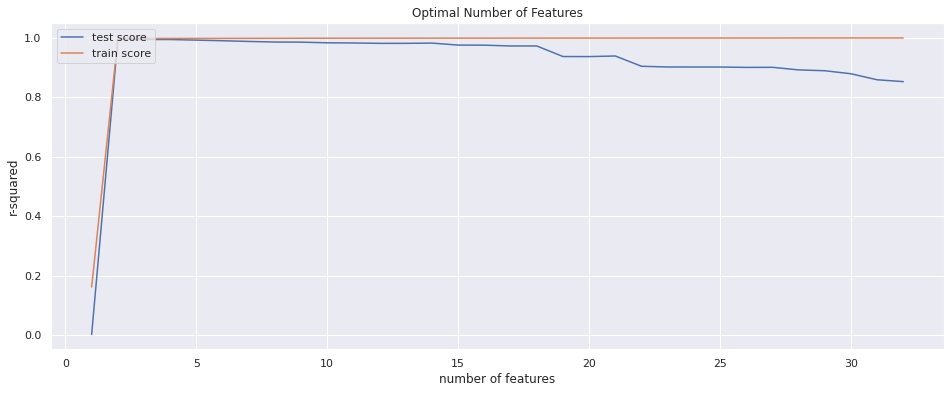

In [1380]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [1381]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1382]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('order_week', False, 5),
 ('units', False, 24),
 ('sla', False, 21),
 ('product_mrp', True, 1),
 ('discountprice', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', False, 7),
 ('Sponsorship', False, 9),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', False, 3),
 ('SEM', True, 1),
 ('NPS', True, 1),
 ('Stock Index', False, 12),
 ('Adstock_Digital', False, 11),
 ('Adstock_Sponsorship', False, 4),
 ('Adstock_Online marketing', True, 1),
 ('Adstock_TV', False, 16),
 ('Year_y', True, 1),
 ('Month_y', False, 2),
 ('Day', False, 10),
 ('Max Temp (°C)', False, 17),
 ('Min Temp (°C)', False, 8),
 ('Mean Temp (°C)', False, 6),
 ('Heat Deg Days (°C)', False, 23),
 ('Cool Deg Days (°C)', False, 18),
 ('Total Rain (mm)', False, 14),
 ('Total Snow (cm)', False, 15),
 ('Total Precip (mm)', False, 13),
 ('Snow on Grnd (cm)', False, 19),
 ('holidays', False, 22),
 ('payday', False, 20)]

In [1383]:
# predict 
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)
# predict prices of X_test
y_pred = rfe.predict(X_train)

# evaluate the model on training set
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print(r2)

0.9974212792996189
0.9987536382880515


The result is quite good. So we can proceed with 10 features.

In [1384]:
col = X_train.columns[rfe.support_]
col

Index(['product_mrp', 'discountprice', 'Total Investment', 'TV',
       'Content Marketing', 'Online marketing', 'SEM', 'NPS',
       'Adstock_Online marketing', 'Year_y'],
      dtype='object')

In [1385]:
X_train.columns[~rfe.support_]

Index(['order_week', 'units', 'sla', 'Digital', 'Sponsorship', 'Affiliates',
       'Stock Index', 'Adstock_Digital', 'Adstock_Sponsorship', 'Adstock_TV',
       'Month_y', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'holidays',
       'payday'],
      dtype='object')

Preparing Modeling for hamdcl data frame.

In [1386]:
#train test split
# Putting response variable to y
y = hamdcl['gmv']
y.head()

0    2801.0
1    2228.0
2    2234.0
3    2149.0
4    2210.0
Name: gmv, dtype: float64

In [1387]:
# Putting feature variable to X
X = hamdcl.drop("gmv",axis = 1)
X.head()

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,1.0,3.0,4690.0,1889.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1.0,7.0,3513.0,1296.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1.0,7.0,3626.0,1402.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1.0,7.0,3562.0,1421.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,1.0,7.0,3608.0,1406.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,0.21533,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1388]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(35, 33)

(35,)

(15, 33)

(15,)

In [1389]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(35, 33)

(35,)

(15, 33)

(15,)

In [1390]:
#scalling the data
scaler = MinMaxScaler()

In [1391]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

#performing scaling on test data
X_test = scaler.transform(X_test)

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
25,0.54,0.0,0.333333,0.641375,0.563789,0.373196,0.458428,0.000000,0.000000,0.261118,0.936133,1.000000,0.016476,0.264150,0.162996,0.064634,0.231366,1.000000,0.661364,1.0,0.000000,0.391304,0.114286,0.129032,0.093750,0.880000,0.000000,0.230769,0.0,0.1875,1.0,0.0,1.0
26,0.56,0.0,0.333333,0.570836,0.537051,0.373196,0.458428,0.000000,0.000000,0.261118,0.936133,1.000000,0.016476,0.264150,0.162996,0.064634,0.231366,1.000000,0.661364,1.0,0.000000,0.695652,0.085714,0.595128,0.590561,0.297959,0.195335,0.000000,0.0,0.0000,0.0,1.0,0.0
35,0.74,0.0,0.666667,0.065205,0.032086,0.541906,1.000000,0.135125,0.464631,0.107189,0.742500,0.831104,0.051720,0.453100,0.000000,0.152990,0.368502,0.824282,1.000000,1.0,0.181818,0.826087,0.457143,0.354839,0.406250,0.480000,0.000000,1.000000,0.0,0.8125,0.0,0.0,0.0
17,0.36,0.0,0.666667,0.420865,0.327731,0.223094,0.440886,0.067355,0.123920,0.048706,0.791265,0.886522,0.052729,0.255030,0.960352,0.527563,0.451847,0.926750,0.682008,0.0,0.909091,0.304348,0.485714,0.516129,0.500000,0.360000,0.000000,0.384615,0.0,0.3125,0.0,1.0,1.0
7,0.16,0.0,0.666667,0.353883,0.290298,0.517279,0.403336,0.074017,0.728045,0.176978,0.653202,0.658241,0.087496,0.247719,0.378855,0.065286,0.514533,0.460549,0.353393,0.0,0.727273,0.086957,0.942857,1.000000,0.968750,0.000000,0.857143,0.769231,0.0,0.6250,0.0,0.0,1.0


In [1392]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1393]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028937,0.002689,0.001746,0.000902,1,{'n_features_to_select': 1},0.233606,-2.198683,-0.416238,0.343300,0.650031,-0.277597,1.021482,19,0.542118,0.490988,0.032949,0.341475,0.405820,0.362670,0.178715
1,0.028233,0.003351,0.001322,0.000076,2,{'n_features_to_select': 2},0.992147,0.992093,-0.498723,0.996318,0.996656,0.695698,0.597214,17,0.998621,0.996942,0.040592,0.996200,0.996765,0.805824,0.382617
2,0.024916,0.001089,0.001392,0.000174,3,{'n_features_to_select': 3},0.992167,0.992557,-0.618967,0.996387,0.996397,0.671708,0.645340,18,0.998621,0.997008,0.073235,0.996715,0.997184,0.812552,0.369660
3,0.026049,0.003258,0.001365,0.000170,4,{'n_features_to_select': 4},0.993092,0.981304,0.109306,0.996379,0.996396,0.815295,0.353039,16,0.998656,0.997778,0.253660,0.996720,0.997184,0.848800,0.297571
4,0.023622,0.001190,0.001225,0.000015,5,{'n_features_to_select': 5},0.993870,0.986153,0.163362,0.996362,0.994997,0.826949,0.331812,14,0.998756,0.997856,0.278237,0.996777,0.997258,0.853777,0.287771


<Figure size 1152x432 with 0 Axes>

Text(0.5, 0, 'number of features')

Text(0, 0.5, 'r-squared')

Text(0.5, 1.0, 'Optimal Number of Features')

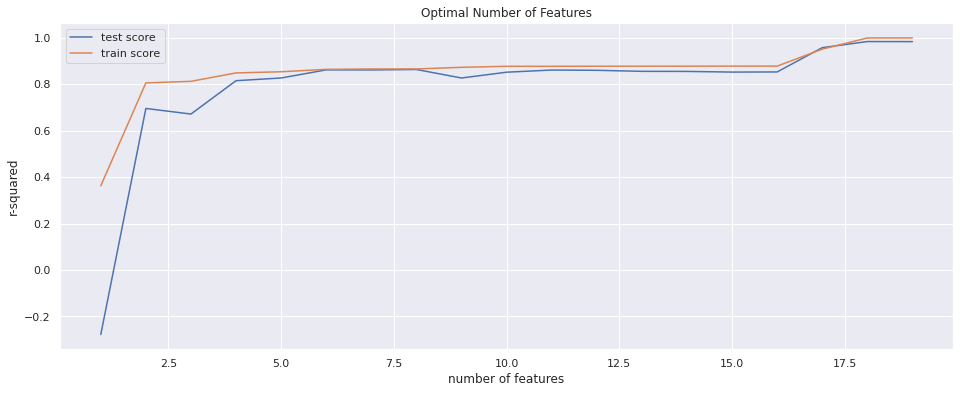

In [1394]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From this we can see we can get a good result with 7 features but i ma going with 10 features which can be explained as best features.

In [1395]:
# final model
n_features_optimal = 7

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)     
rfe = rfe.fit(X_train, y_train)

# predict gmv of X_train
y_pred = rfe.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print("\nR2 Test",r2)

# predict gmv of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 Test",r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Test 0.9977766255291135
R2 Test 0.9969807961097652


In [1396]:
#Features which are best describing the models are as follows
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'product_mrp', 'discountprice',
       'Adstock_Online marketing', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)'],
      dtype='object')

## preparing model for camera accessories.

In [1397]:
#train test split
# Putting response variable to y
y = camdcl['gmv']
y.head()

0     673.846154
1    1386.909710
2    1503.612204
3    1467.413828
4     699.000000
Name: gmv, dtype: float64

In [1398]:
# Putting feature variable to X
X = camdcl.drop("gmv",axis = 1)
X.head()

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,1.000000,2.384615,1511.961538,838.115385,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1.045503,7.056252,2487.551415,1097.306787,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1.032678,6.390797,2577.021007,1081.177270,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1.039798,6.410455,2563.709949,1111.798583,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,32,1.000000,5.000000,1450.000000,751.000000,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103,2015.0,8.0,6.0,27.0,16.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0


In [1399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape


X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

#performing scaling on test data
X_test = scaler.transform(X_test)

(29, 33)

(29,)

(13, 33)

(13,)

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
32,0.80,0.433208,0.433874,0.351824,0.341012,0.313667,0.559394,0.034183,0.278020,0.010124,0.675889,0.770220,0.058015,0.476577,1.000000,0.059195,0.362393,0.747641,0.929591,1.0,0.272727,0.416667,0.628571,0.433333,0.548387,0.32,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25,0.62,0.705400,0.679955,0.600094,0.433973,0.260386,0.277565,0.119727,0.127525,0.173273,0.815225,0.875967,0.080239,0.380340,0.911894,0.077282,0.081360,0.915779,0.444885,1.0,0.090909,0.291667,0.000000,0.000000,0.000000,1.00,0.0,0.000000,1.0,0.230769,1.0,1.0,0.0
28,0.70,0.638892,0.565654,0.770479,0.730403,0.575196,1.000000,0.135125,0.484715,0.107429,0.755225,0.842066,0.091117,0.296507,0.000000,0.152990,0.383503,0.827097,1.000000,1.0,0.181818,0.250000,0.542857,0.533333,0.548387,0.32,0.0,0.692308,0.0,0.692308,0.0,1.0,0.0
19,0.48,0.602952,0.699928,0.993022,0.900113,0.615905,0.580086,0.214307,0.665502,0.309895,0.922944,0.925570,0.294678,0.089912,0.101322,0.206299,0.530307,0.944023,0.705581,0.0,1.000000,0.833333,0.428571,0.466667,0.483871,0.40,0.0,0.538462,0.0,0.538462,0.0,1.0,0.0
13,0.34,0.636538,0.601306,0.627391,0.590282,0.279553,0.453453,0.067355,0.156786,0.048962,0.801580,0.893887,0.092084,0.166891,0.960352,0.527563,0.464868,0.927923,0.685080,0.0,0.909091,0.041667,0.657143,0.666667,0.677419,0.16,0.0,0.153846,0.0,0.153846,0.0,1.0,0.0


In [1400]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1401]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031835,0.009013,0.001365,0.000214,1,{'n_features_to_select': 1},0.827022,-1.012219,0.395568,0.830097,0.920537,0.392201,0.725585,13,0.962735,0.032346,0.127088,0.943620,0.943632,0.601884,0.427456
1,0.026373,0.002201,0.001305,0.000103,2,{'n_features_to_select': 2},0.999166,-1.030313,0.395955,0.998642,0.999504,0.472591,0.786923,11,0.999711,0.039551,0.515859,0.999676,0.999653,0.710890,0.384430
2,0.025175,0.000892,0.001357,0.000158,3,{'n_features_to_select': 3},0.999134,-1.003483,0.323011,0.998593,0.999447,0.463341,0.778748,12,0.999716,0.045406,0.599894,0.999695,0.999657,0.728874,0.375176
3,0.024264,0.001317,0.001357,0.000234,4,{'n_features_to_select': 4},0.999176,0.988804,0.336387,0.998764,0.996983,0.864023,0.263844,2,0.999735,0.940277,0.601484,0.999701,0.999772,0.908194,0.155074
4,0.024728,0.002075,0.001334,0.000236,5,{'n_features_to_select': 5},0.998763,0.999488,0.308095,0.998447,0.995449,0.860048,0.275980,3,0.999782,0.999543,0.601895,0.999770,0.999779,0.920154,0.159129


<Figure size 1152x432 with 0 Axes>

Text(0.5, 0, 'number of features')

Text(0, 0.5, 'r-squared')

Text(0.5, 1.0, 'Optimal Number of Features')

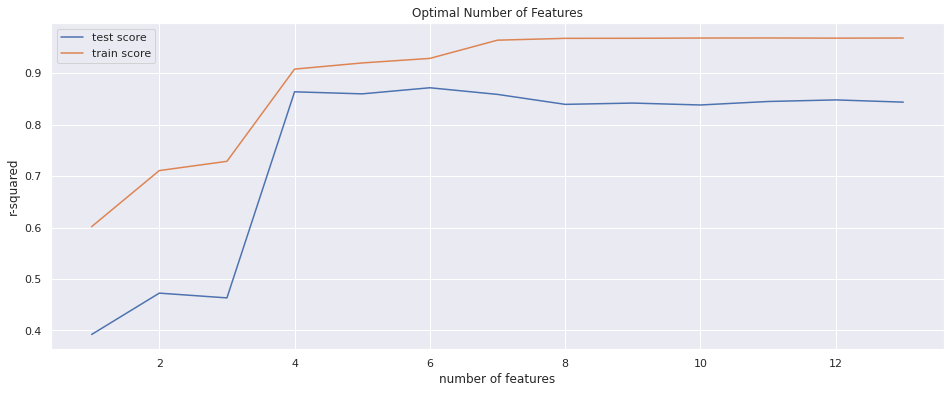

In [1402]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [1403]:
# final model
n_features_optimal = 6

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)     
rfe = rfe.fit(X_train, y_train)

# predict gmv of X_train
y_pred = rfe.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print("\nR2 Test",r2)

# predict gmv of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 Test",r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Test 0.9996611845766726
R2 Test 0.9397268613043729


In [1404]:
#Features which are best describing the models are as follows
col = X_train.columns[rfe.support_]
col

Index(['product_mrp', 'discountprice', 'Year_y', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)'],
      dtype='object')

# Koyck Model 

## Koyck Model for Camera Accessory Category

In [1405]:
camdcl.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_mrp', 'discountprice',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'NPS', 'Stock Index',
       'Adstock_Digital', 'Adstock_Sponsorship', 'Adstock_Online marketing',
       'Adstock_TV', 'Year_y', 'Month_y', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'holidays', 'payday'],
      dtype='object')

In [1406]:
camera_km = camdcl.copy()          


camera_km.head()

,order_week,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,673.846154,1.000000,2.384615,1511.961538,838.115385,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1386.909710,1.045503,7.056252,2487.551415,1097.306787,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1503.612204,1.032678,6.390797,2577.021007,1081.177270,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1467.413828,1.039798,6.410455,2563.709949,1111.798583,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,32,699.000000,1.000000,5.000000,1450.000000,751.000000,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103,2015.0,8.0,6.0,27.0,16.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0


In [1407]:
camera_km['lag_1_gmv'] = camera_km['gmv'].shift(-1)

In [1408]:
camera_km.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
discountprice               0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
Affiliates                  0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Adstock_TV                  0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               0
Mean Temp (°C)              0
Heat Deg Days (°C)          0
Cool Deg Days (°C)          0
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday    

In [1409]:
camera_km = camera_km.fillna(0)

In [1410]:
camera_km.head()

,order_week,gmv,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday,lag_1_gmv
0,27,673.846154,1.000000,2.384615,1511.961538,838.115385,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1386.909710
1,28,1386.909710,1.045503,7.056252,2487.551415,1097.306787,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0,1503.612204
2,29,1503.612204,1.032678,6.390797,2577.021007,1081.177270,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1,1467.413828
3,30,1467.413828,1.039798,6.410455,2563.709949,1111.798583,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278,0.215330,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0,699.000000
4,32,699.000000,1.000000,5.000000,1450.000000,751.000000,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883,0.114103,2015.0,8.0,6.0,27.0,16.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0,299.000000


In [1411]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = camera_km.columns

### Scale these variables using 'fit_transform'
camera_km[varlist] = scaler.fit_transform(camera_km[varlist])

In [1412]:
from sklearn.model_selection import train_test_split
x = camera_km.drop('gmv',axis=1)
y = camera_km['gmv']

camera_train_km = camera_km

In [1413]:
print(x.shape,y.shape)

(42, 34) (42,)


In [1414]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1415]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

,0,Coefficient
0,order_week,-0.891891
1,units,0.003183
2,sla,0.005405
3,product_mrp,1.635084
4,discountprice,-1.122593
5,Total Investment,0.094328
6,TV,-0.058786
7,Digital,-0.063682
8,Sponsorship,0.052847
9,Content Marketing,-0.201234


In [1416]:
col = x.columns
col

Index(['order_week', 'units', 'sla', 'product_mrp', 'discountprice',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'NPS', 'Stock Index',
       'Adstock_Digital', 'Adstock_Sponsorship', 'Adstock_Online marketing',
       'Adstock_TV', 'Year_y', 'Month_y', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'holidays', 'payday',
       'lag_1_gmv'],
      dtype='object')

In [1417]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1439]:
def stepwise_selection(x, y,
                       initial_list=['order_week', 'units', 'sla', 'product_mrp', 'discountprice',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'NPS', 'Stock Index',
       'Adstock_Digital', 'Adstock_Sponsorship', 'Adstock_Online marketing',
       'Adstock_TV', 'Year_y', 'Month_y', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'holidays', 'payday',
       'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            print(best_feature)
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            #print(x.loc[worst_feature])
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1440]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

ValueError: ignored

In [1187]:
ConsumerElectronic_Koyck_Camera = camdcl.copy()

In [1188]:
ConsumerElectronic_Koyck_Camera['GMV_1']=ConsumerElectronic_Koyck_Camera['gmv'].shift(-1)
ConsumerElectronic_Koyck_Camera=ConsumerElectronic_Koyck_Camera.fillna(0)

In [1189]:
columns=ConsumerElectronic_Koyck_Camera.columns

In [1190]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [1207]:
X=ConsumerElectronic_Koyck_Camera.drop('gmv',axis=1)
y=ConsumerElectronic_Koyck_Camera['gmv']
x_train,x_cv, y_train,y_cv=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1208]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [1236]:
def stepwise_selection(x_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
  
  included = list(initial_list)
  while True:
        changed=False
        # forward step
        excluded = list(set(x_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(x_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(x_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
  return included

In [1237]:
result = stepwise_selection(x_train,y_train)
print('Camera Features:')
print(result)

Add                              50 with p-value 3.1835e-10


KeyError: ignored

In [1213]:
camdcl.columns
ConsumerElectronic_DistributedLag_Camera=camdcl.copy()

Index(['order_week', 'gmv', 'units', 'sla', 'product_mrp', 'discountprice',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'NPS', 'Stock Index',
       'Adstock_Digital', 'Adstock_Sponsorship', 'Adstock_Online marketing',
       'Adstock_TV', 'Year_y', 'Month_y', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'holidays', 'payday'],
      dtype='object')

In [1214]:
ConsumerElectronic_DistributedLag_Camera['GMV_1']=ConsumerElectronic_DistributedLag_Camera['gmv'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['GMV_2']=ConsumerElectronic_DistributedLag_Camera['gmv'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['GMV_3']=ConsumerElectronic_DistributedLag_Camera['gmv'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['discountprice_1']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['discountprice_2']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['discountprice_3']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['SLA_1']=ConsumerElectronic_DistributedLag_Camera['sla'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['SLA_2']=ConsumerElectronic_DistributedLag_Camera['sla'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['SLA_3']=ConsumerElectronic_DistributedLag_Camera['sla'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['NPS_1']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['NPS_2']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['NPS_3']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-3)


ConsumerElectronic_DistributedLag_Camera['HoliDays_1']=ConsumerElectronic_DistributedLag_Camera['holidays'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['HoliDays_2']=ConsumerElectronic_DistributedLag_Camera['holidays'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['HoliDays_3']=ConsumerElectronic_DistributedLag_Camera['holidays'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['MRP_1']=ConsumerElectronic_DistributedLag_Camera['product_mrp'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['MRP_2']=ConsumerElectronic_DistributedLag_Camera['product_mrp'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['MRP_3']=ConsumerElectronic_DistributedLag_Camera['product_mrp'].shift(-3)

ConsumerElectronic_DistributedLag_Camera=ConsumerElectronic_DistributedLag_Camera.fillna(0)

In [1215]:
#column names
names = ConsumerElectronic_DistributedLag_Camera.columns

In [1216]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [1217]:
scaled_camera = scaler.fit_transform(ConsumerElectronic_DistributedLag_Camera)
scaled_camera = pd.DataFrame(scaled_camera, columns=names)

In [1220]:
X=scaled_camera.drop(columns=['gmv'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_camera.gmv)

In [1224]:
x_train.reset_index(drop=True)

,order_week,units,sla,product_mrp,discountprice,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Adstock_TV,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday,GMV_1,GMV_2,GMV_3,discountprice_1,discountprice_2,discountprice_3,SLA_1,SLA_2,SLA_3,NPS_1,NPS_2,NPS_3,HoliDays_1,HoliDays_2,HoliDays_3,MRP_1,MRP_2,MRP_3
0,0.613616,0.524234,-0.042425,0.670555,0.492053,0.788927,2.318002,-0.073939,0.549901,-0.306162,0.287999,0.450682,-0.285662,-0.134056,-1.887655,-0.151371,0.163417,0.378740,1.622745,0.953463,-0.964806,-0.796661,-0.137674,-0.332625,-0.268197,0.128919,-0.687256,2.019493,-0.345611,1.744511,-0.264477,1.493576,-0.707107,-0.417738,-0.433766,-0.154156,0.045080,-0.474453,0.208734,-0.006711,-0.051465,0.140550,0.090395,0.185040,0.467804,-0.669534,-0.669534,-0.632456,-0.250581,-0.494762,0.009492
1,-1.074214,1.185350,0.346171,0.971352,0.737031,0.696394,0.146869,-0.326307,1.429746,-0.026418,0.034437,-0.029552,-0.144037,-0.660944,-0.793239,-0.484664,0.732352,-0.662297,-0.436787,-1.048809,0.771845,-0.796661,0.688370,0.994931,0.773537,-0.844758,0.770200,-0.395274,-0.345611,-0.434506,-0.264477,-0.669534,-0.707107,1.020788,0.871555,0.415147,0.663034,0.954630,0.400568,0.519394,0.255950,0.308558,-0.156551,-0.002526,-0.095111,-0.669534,-0.669534,-0.632456,0.984384,0.978318,0.429756
2,0.094284,-0.423711,0.538668,-0.138341,-0.432931,0.155019,0.347338,-0.631987,-1.002035,0.310856,0.837822,0.919895,-0.425184,-0.618793,-1.416801,-0.487142,-0.370863,0.881661,0.544144,0.953463,-1.543690,-0.250379,-1.686507,-1.780867,-1.888672,2.076272,-0.687256,0.208417,-0.345611,0.110248,5.906657,-0.669534,1.414214,0.642890,0.885158,-0.226459,-0.086971,0.032888,-0.101929,0.294819,0.544630,0.363536,-0.136795,0.012479,0.354133,1.493576,-0.669534,1.581139,0.378624,0.560529,-0.174489
3,0.418866,0.074725,0.226757,-0.684113,-0.748735,-0.486628,-0.371230,-0.137534,-0.689674,-0.042159,0.467226,0.551400,-0.330592,0.194595,0.746578,-0.439078,-1.042372,0.636690,-0.162619,0.953463,-1.254248,0.295902,-0.344185,-1.298120,-0.846938,0.824402,-0.687256,-0.697120,-0.345611,-0.706884,0.352636,1.493576,1.414214,-0.610635,0.595823,-0.172646,-0.191340,0.487970,0.192968,0.228913,0.128356,0.182461,0.244429,0.185040,0.255112,-0.669534,1.493576,-0.632456,-0.486129,0.601226,-0.012330
4,-0.165383,0.339974,0.660416,0.888210,0.227500,0.953872,0.754890,0.253069,1.177292,0.505632,0.788997,0.698768,0.555111,-0.943967,-1.594962,0.051217,0.749283,0.718842,0.675834,-1.048809,1.640171,0.159332,-1.170229,-1.298120,-1.425679,1.519885,-0.687256,-0.093429,-0.345611,-0.162129,-0.264477,-0.669534,1.414214,1.199470,-0.396721,0.271380,0.810876,-0.446814,-0.039325,0.282765,0.005007,0.495130,-0.289200,0.012479,0.109063,1.493576,-0.669534,-0.632456,1.165224,-0.462325,0.147671
5,-0.230299,-0.100121,-0.178358,1.327687,0.998774,0.953872,0.754890,0.253069,1.177292,0.505632,0.788997,0.698768,0.555111,-0.943967,-1.594962,0.051217,0.749283,0.718842,0.675834,-1.048809,1.640171,-0.796661,-0.550696,-0.211938,-0.383945,0.268016,-0.687256,-0.697120,-0.345611,-0.706884,-0.264477,-0.669534,-0.707107,0.998328,1.152925,-0.277212,0.258885,0.781729,-0.319861,0.552148,0.336996,0.093130,-0.289200,-0.103279,0.109063,-0.669534,1.493576,-0.632456,0.765840,1.083588,-0.322130
6,-1.333880,-2.431248,-0.121763,-0.509024,3.412511,-1.541668,-1.404455,-0.352938,-1.132228,-0.736904,-1.967952,-2.051055,-0.662004,2.623834,0.542966,-0.312162,-1.367066,-2.027026,-1.593459,-1.048809,0.482403,-0.386949,1.307903,1.356992,1.352278,-0.983854,2.227656,0.208417,-0.345611,0.110248,-0.264477,1.493576,1.414214,-2.227917,0.801619,1.002025,-3.004235,0.652255,0.663522,2.742855,0.360698,0.535319,1.382981,-0.002526,0.096363,1.493576,-0.669534,-0.632456,-2.884030,0.800694,0.919207
7,-0.684715,0.749540,0.991793,0.42021

In [1227]:
y_train.reset_index(drop=True)

0     0.601123
1     0.867037
2     0.089408
3    -0.444438
4     1.090198
5     1.166836
6    -3.023983
7     0.623077
8    -0.729232
9     1.320967
10   -0.534450
11    0.403904
12   -0.610058
13   -0.681366
14   -0.082026
15   -0.638742
16   -0.755760
17    1.119083
18    0.213075
19   -0.864987
20   -2.611263
21   -0.251180
22    0.974980
23    0.188262
24    0.957403
25   -0.385805
26    0.717703
27    0.711748
28   -0.620192
29   -0.508472
30    1.369865
Name: gmv, dtype: float64

In [1234]:
result = stepwise_selection(x_train,y_train)
print('Camera Features:')
print(result)

Add                              50 with p-value 3.1835e-10


KeyError: ignored